**LOADING PACKAGES**

In [1]:
import pandas as pd
from scripts import GetData, SentimentPrediction, Visualization, Preprocessing, GraphAnalysis
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import numpy as np
from operator import itemgetter
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth",None)

**COLLECT TWEETS AND EXPLORATION**

- GET DATA

In [2]:
path = "Data/"
df = GetData(path).retrieve_tweets()

## Keep tweets related to Covid since January 2020
df = df[(df["date"]>="2020-01-01") & (df["lang"].isin(["en","fr"]))]
df.head(2)

,index,Account,id_str,created_at,full_text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_screen_name,retweet_count,retweeted,lang,original_tweet_id,original_text,Pays,date
199,1759500,MSPS_Togo,1214940845368999936,2020-01-08 16:04:04,Middle East respiratory syndrome coronavirus (MERS-CoV) – The United Arab Emirates https://t.co/KRZDK2jzfS https://t.co/TGHWAWUSXP,dlvr.it,False,NaN,NaN,NaN,0,False,en,NaN,NaN,Togo,2020-01-08
200,3385396,health_malawi,1215225121021054977,2020-01-09 10:53:41,RT @WHOWPRO: Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @…,Twitter Web App,False,NaN,NaN,NaN,177,False,en,1.215167e+18,Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @WHO continues to monitor the situation closely and is ready to support #China to investigate and respond to this outbreak. https://t.co/0zR6iZWrcm (1/7),Malawi,2020-01-09


- EXPLORATION AND VIZUALISATION

In [3]:
## Shape of our data
df.shape

(128459, 17)

In [4]:
## Date range of our data
print("Début d'émission des tweets sur le covid : {debut} | Fin de collecte de ces tweets : {fin}".\
      format(debut=df["date"].min(),fin=df["date"].max()))

Début d'émission des tweets sur le covid : 2020-01-08 00:00:00 | Fin de collecte de ces tweets : 2021-02-24 00:00:00


Text(0.5, 0, 'Date')

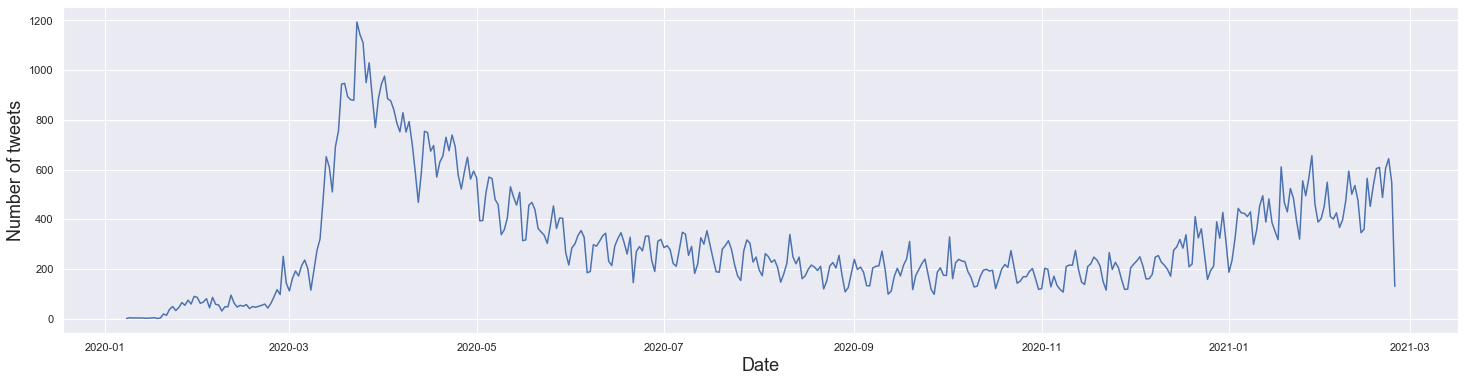

In [5]:
## Tweet's number evolution
fig_dims = (25, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.plot(df['date'].value_counts().sort_index())
plt.ylabel("Number of tweets",fontsize=18)
plt.xlabel("Date",fontsize=18)

- PREPROCESSING

In [6]:
## Remove stop words
lst_words = ["rt","amp"]
preproc = Preprocessing(df, lst_words)

df = preproc.remove_some_words()
df.head(2)

,index,Account,id_str,created_at,full_text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_screen_name,retweet_count,retweeted,lang,original_tweet_id,original_text,Pays,date
199,1759500,MSPS_Togo,1214940845368999936,2020-01-08 16:04:04,middle east respiratory syndrome coronavirus merscov – united arab emirates,dlvr.it,False,NaN,NaN,NaN,0,False,en,NaN,NaN,Togo,2020-01-08
200,3385396,health_malawi,1215225121021054977,2020-01-09 10:53:41,whowpro chinese authorities made preliminary determination cause pneumonia wuhan novel new coronavirus …,Twitter Web App,False,NaN,NaN,NaN,177,False,en,1.215167e+18,Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @WHO continues to monitor the situation closely and is ready to support #China to investigate and respond to this outbreak. https://t.co/0zR6iZWrcm (1/7),Malawi,2020-01-09


In [ ]:
## Translate french tweets to english with google translate API

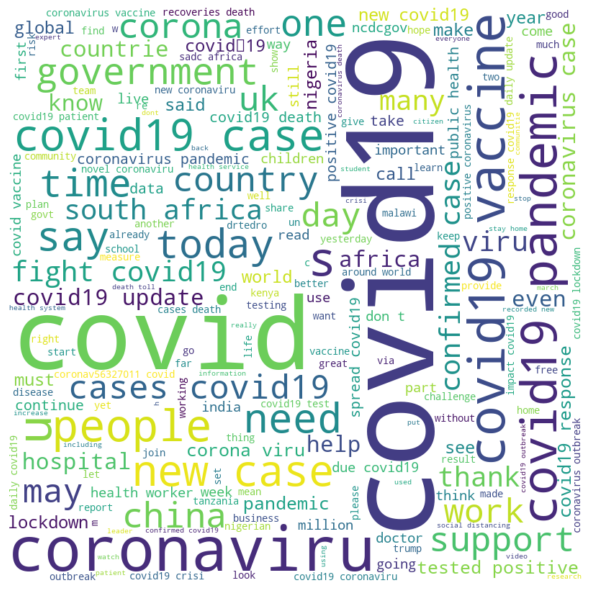

In [7]:
## Word Cloud for English corpus
dataviz = Visualization(df,"en")
dataviz.word_cloud()

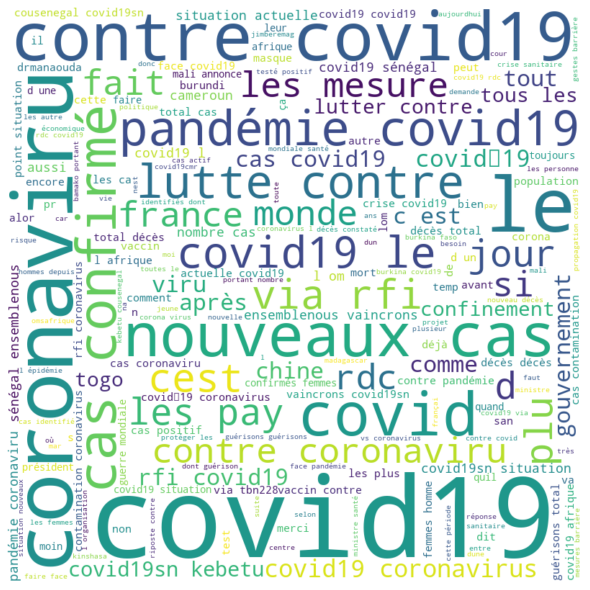

In [8]:
## Word Cloud for French corpus
dataviz = Visualization(df,"fr")
dataviz.word_cloud()

**Preprocessing**

**SENTIMENT PREDICTION**

- VADER

In [10]:
df_english = df[df["lang"]=="en"][["Pays","id_str","date","full_text"]]

In [11]:
df_english = SentimentPrediction(df_english).vader_prediction()
df_english.head()

,Pays,id_str,date,full_text,compound,sentiment
199,Togo,1214940845368999936,2020-01-08,middle east respiratory syndrome coronavirus merscov – united arab emirates,0.4215,Positive
200,Malawi,1215225121021054977,2020-01-09,whowpro chinese authorities made preliminary determination cause pneumonia wuhan novel new coronavirus …,0.6124,Positive
201,OMS Ouest Africain,1215373449285308417,2020-01-09,protect reduce risk coronavirus infection 👏🏽hand hygiene 🤧cover mouth nose coughing sneezing 🥩thoroughl…,-0.1531,Negative
202,OMS Ouest Africain,1215243578873696256,2020-01-09,helenbranswell took earlier tweet wasnt clear enough confirming chinese authorities think new coronavirus —…,-0.2924,Negative
204,Republic Democratique du Congo,1215528646540087297,2020-01-10,whowpro protect reduce risk coronavirus infection 👏🏽hand hygiene 🤧cover mouth nose coughing sneezing 🥩thoro…,-0.1531,Negative


In [12]:
df_english["sentiment"].value_counts()

Positive    40144
Neutral     31028
Negative    28060
Name: sentiment, dtype: int64

Text(0.5, 0, 'Date')

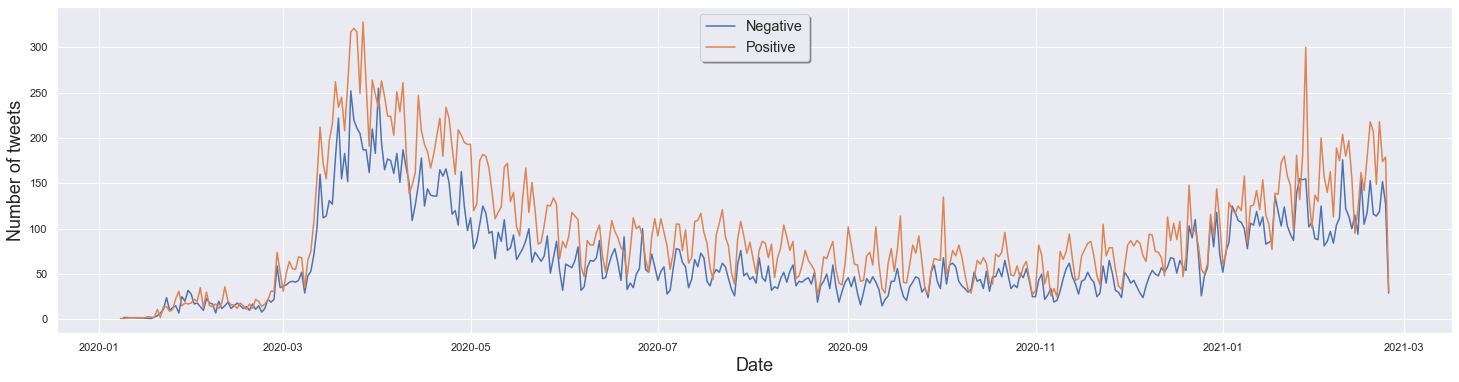

In [13]:
## Evolution temporelle de la polarité
fig_dims = (25, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.plot(df_english[df_english["sentiment"]=="Negative"]['date'].value_counts().sort_index(),label='Negative')
plt.plot(df_english[df_english["sentiment"]=="Positive"]['date'].value_counts().sort_index(),label='Positive')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.ylabel("Number of tweets",fontsize=18)
plt.xlabel("Date",fontsize=18)

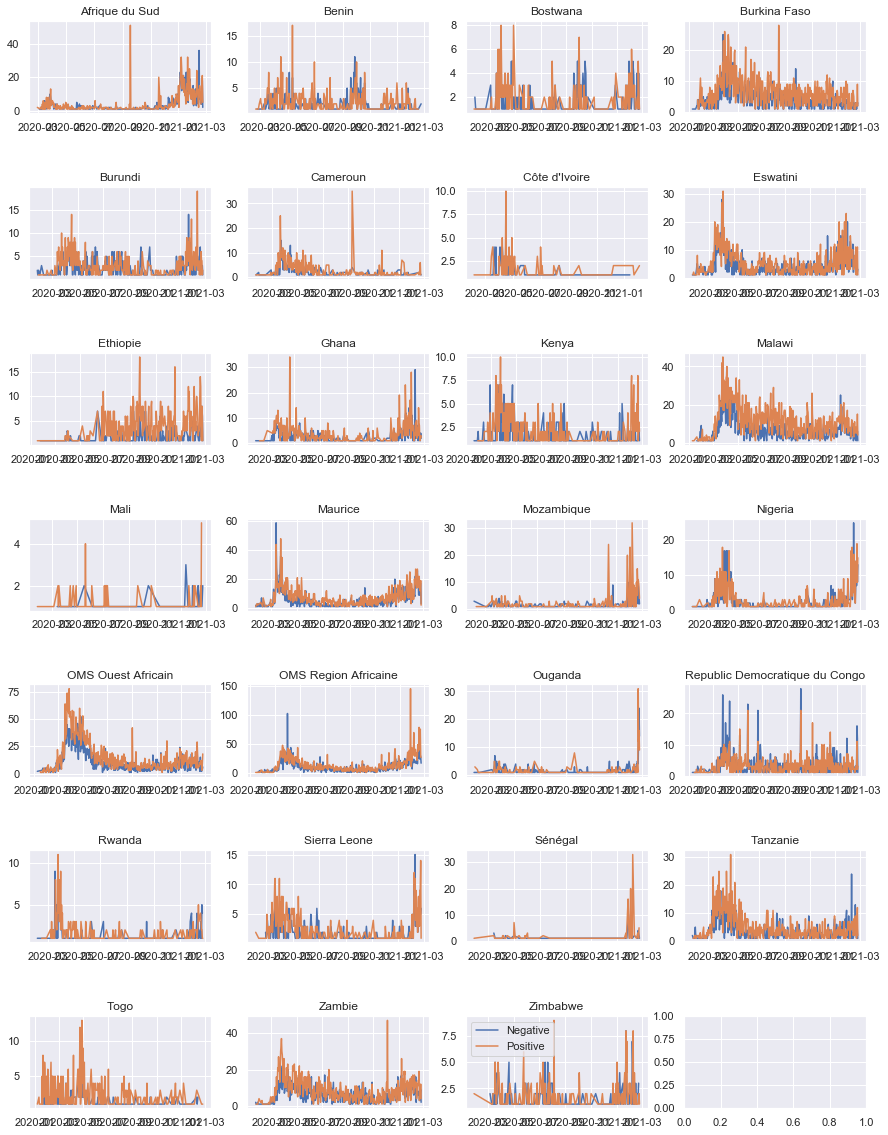

In [16]:
grouped = df_english.groupby("Pays")
rowlength = grouped.ngroups/7
fig, axs = plt.subplots(figsize=(15,20), nrows=7, ncols = int(np.ceil(rowlength)),gridspec_kw=dict(hspace=0.8))
targets = zip(grouped.groups.keys(), axs.flatten())

for i, (key, ax) in enumerate(targets):
    df_grouped = grouped.get_group(key)
    ax.plot(df_grouped[df_grouped["sentiment"]=="Negative"]['date'].value_counts().sort_index(),label='Negative')
    ax.plot(df_grouped[df_grouped["sentiment"]=="Positive"]['date'].value_counts().sort_index(),label='Positive')
    ax.set_title("%s"%key)
ax.legend()

In [13]:
positive_tweets, negative_tweets = df_english[df_english["sentiment"]=="Positive"], \
                                    df_english[df_english["sentiment"]=="Negative"]

In [14]:
positive_tweets.head(20)

,country,id_str,date,full_text,compound,sentiment
206,Malawi,1215225121021054977,2020-01-09,whowpro chinese authorities made preliminary determination cause pneumonia wuhan novel new coronavirus …,0.6124,Positive
217,OMS Region Africaine,1216109647637221376,2020-01-11,nycbat rapid phylogenetic analysis novel wuhan china human coronavirus shows definitely clusters sarsrelated cov clad…,0.6124,Positive
218,OMS Region Africaine,1215830956503900162,2020-01-11,bactiman63 china pneumonia outbreak novel coronavirus,0.3182,Positive
220,Zambie,1215940691739729920,2020-01-11,new interim guidance range topics help countries manage new coronavirus 👉🏼,0.4019,Positive
222,Malawi,1215916745325793280,2020-01-11,new interim guidance range topics help countries manage new coronavirus 👉🏼,0.4019,Positive
223,Zambie,1215918172475404288,2020-01-11,new interim guidance range topics help countries manage new coronavirus 👉🏼,0.4019,Positive
224,Rwanda,1216297213833482240,2020-01-12,peterdaszak humefield important information released china wuhan coronavirus βcov lineage b distant th…,0.2023,Positive
225,OMS Region Africaine,1216186974857392128,2020-01-12,helenbranswell important information wuhan also important know coronavirus sarslike could potentially cause sars…,0.3818,Positive
227,Malawi,1216588658926661633,2020-01-13,breaking received genetic sequences novel coronavirus 2019ncov chinese authorities expect th…,0.3182,Positive
228,OMS Region Africaine,1216720118777909248,2020-01-13,whothailand whosearo whowpro given developments novel coronavirus 2019nc0v directorgeneral drtedros co…,0.3182,Positive


In [15]:
negative_tweets.head(20)

,country,id_str,date,full_text,compound,sentiment
203,OMS Region Africaine,1215038235954401280,2020-01-08,helenbranswell took earlier tweet wasnt clear enough confirming chinese authorities think new coronavirus —…,-0.2924,Negative
204,OMS Region Africaine,1215162273712394241,2020-01-09,crof china confirms new coronavirus investigates mystery wuhan illness pneumonia,-0.4019,Negative
205,OMS Ouest Africain,1215243578873696256,2020-01-09,helenbranswell took earlier tweet wasnt clear enough confirming chinese authorities think new coronavirus —…,-0.2924,Negative
208,OMS Region Africaine,1215689378560798720,2020-01-10,healthmap china mystery illness likely due new coronavirus,-0.4019,Negative
209,OMS Ouest Africain,1215681257713078278,2020-01-10,coronaviruses large family viruses known cause illness ranging common cold severe diseases…,-0.6486,Negative
210,Zambie,1215698429738913794,2020-01-10,protect reduce risk coronavirus infection 👏🏽hand hygiene 🤧cover mouth nose coughing sneezing 🥩thoroughl…,-0.1531,Negative
211,Republic Democratique du Congo,1215528646540087297,2020-01-10,whowpro protect reduce risk coronavirus infection 👏🏽hand hygiene 🤧cover mouth nose coughing sneezing 🥩thoro…,-0.1531,Negative
214,Côte d'Ivoire,1215424946308046849,2020-01-10,protect reduce risk coronavirus infection 👏🏽hand hygiene 🤧cover mouth nose coughing sneezing 🥩thoroughl…,-0.1531,Negative
219,Zambie,1215941917273395201,2020-01-11,providing information countries prepare new coronavirus incl 🌡 monitor sick people 🔬 te…,-0.5106,Negative
226,OMS Region Africaine,1216187178599862272,2020-01-12,helenbranswell critical china rest us dont assume theyve stopped transmission new sarslike coronavi…,-0.1615,Negative


**GRAPH MINING**

In [3]:
df.head(2)

,index,country,id_str,created_at,full_text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_screen_name,retweet_count,retweeted,lang,original_tweet_id,original_text,date
199,1759500,MSPS_Togo,1214940845368999936,2020-01-08 16:04:04,Middle East respiratory syndrome coronavirus (MERS-CoV) – The United Arab Emirates https://t.co/KRZDK2jzfS https://t.co/TGHWAWUSXP,dlvr.it,False,NaN,NaN,NaN,0,False,en,NaN,NaN,2020-01-08
200,3385396,health_malawi,1215225121021054977,2020-01-09 10:53:41,RT @WHOWPRO: Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @…,Twitter Web App,False,NaN,NaN,NaN,177,False,en,1.215167e+18,Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @WHO continues to monitor the situation closely and is ready to support #China to investigate and respond to this outbreak. https://t.co/0zR6iZWrcm (1/7),2020-01-09


In [4]:
graphClass = GraphAnalysis(df,12)
graph = graphClass.build_graph()

In [5]:
graphClass.statistics_graph(graph)

There are 272 nodes and 254 edges present in the Graph
The maximum degree of the Graph is 20
The minimum degree of the Graph is 1


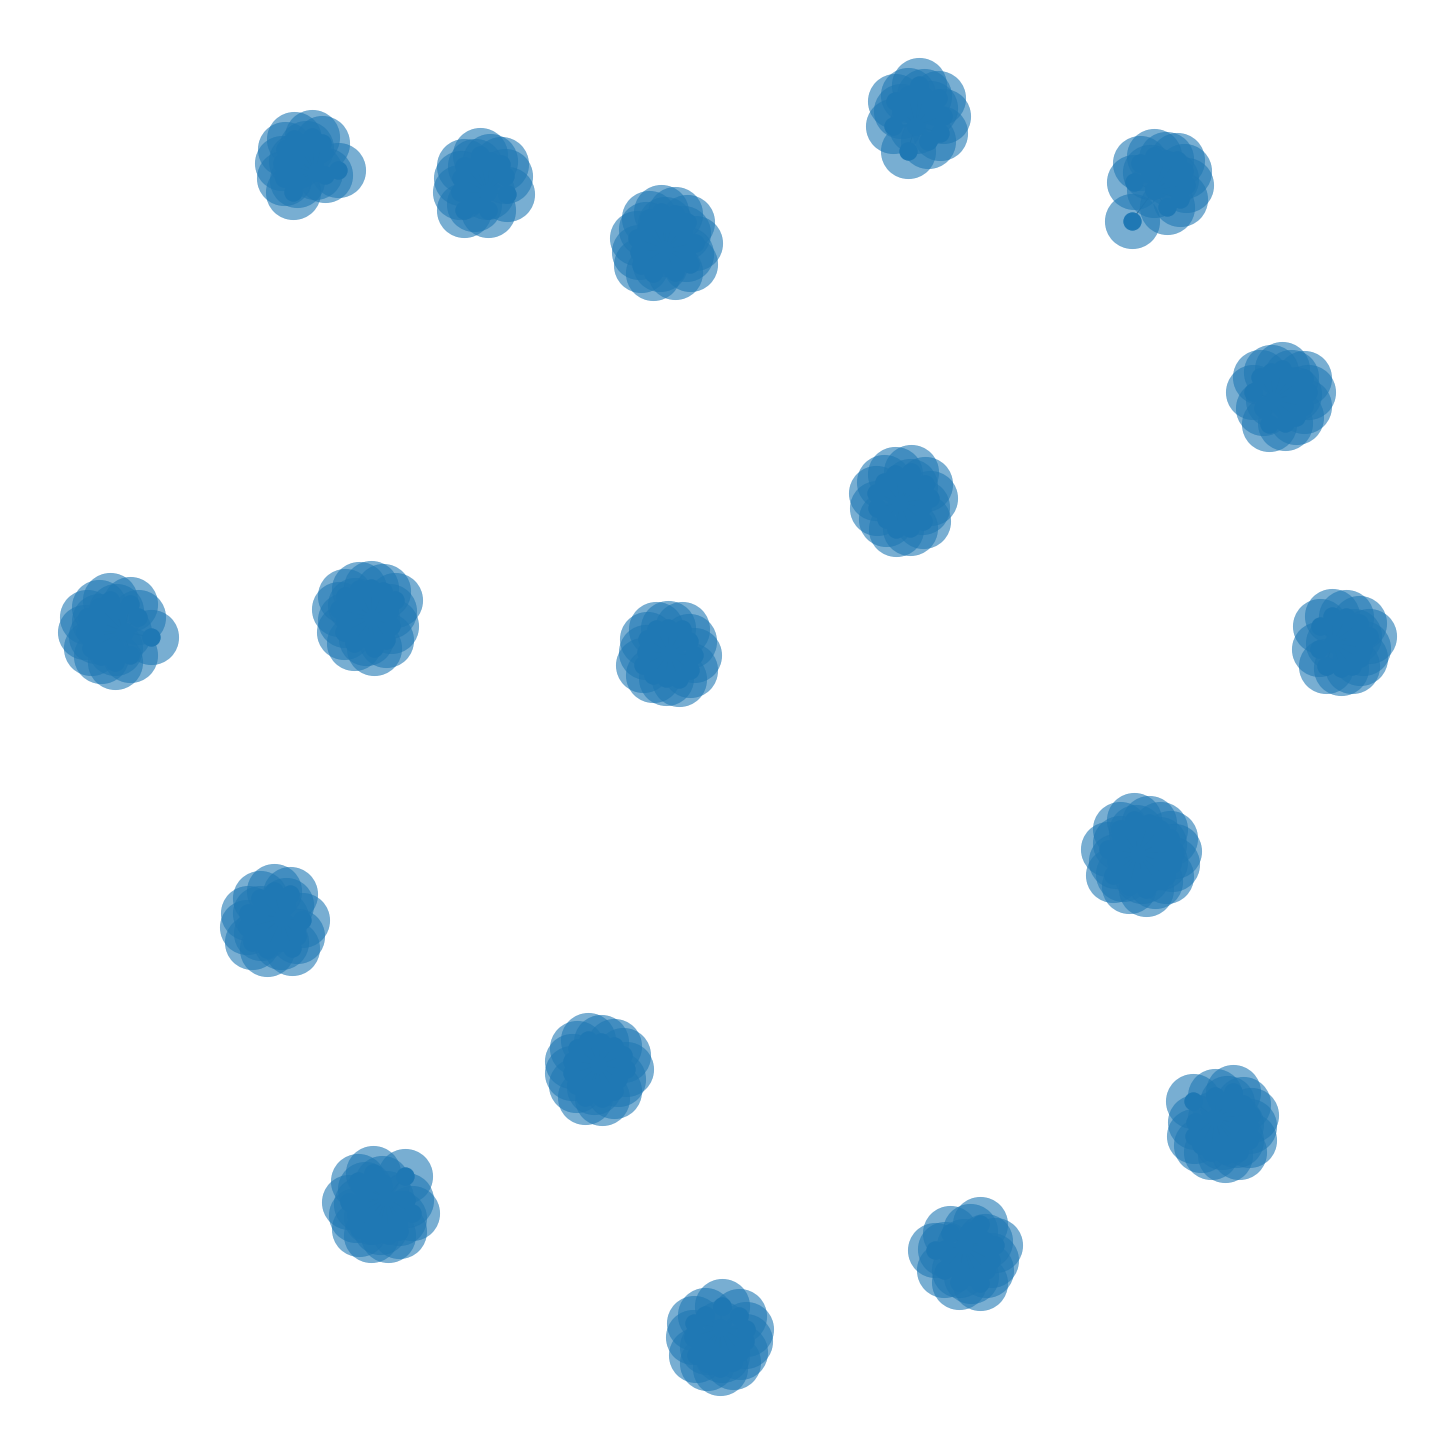

In [6]:
graphClass.graph_viz(graph)

In [7]:
lst_most_retweets = graphClass.most_frequent_tweets()
retweet_data = df[df["original_tweet_id"].isin(lst_most_retweets)]
retweet_data.head()

,index,country,id_str,created_at,full_text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_screen_name,retweet_count,retweeted,lang,original_tweet_id,original_text,date
7556,4422975,tanzaniagov,1239269960737841155,2020-03-15 19:19:17,RT @PaulKagame: I joined @WHO #SafeHands challenge. Handwashing is key to preventing the spread of #COVID19. I challenge President Kenyatta…,Twitter Web App,False,NaN,NaN,NaN,5699,False,en,1.239263e+18,"I joined @WHO #SafeHands challenge. Handwashing is key to preventing the spread of #COVID19. I challenge President Kenyatta @StateHouseKenya, @Macky_Sall, @MagufuliJP, President Tshisekedi @Presidence_RDC, @CyrilRamaphosa, @BorisJohnson, @KGeorgieva to join in by sharing a video https://t.co/udaVPCexCJ",2020-03-15
7932,4337271,tanzaniagov,1239297809549066240,2020-03-15 21:09:57,RT @PaulKagame: I joined @WHO #SafeHands challenge. Handwashing is key to preventing the spread of #COVID19. I challenge President Kenyatta…,Twitter for Android,False,NaN,NaN,NaN,5699,False,en,1.239263e+18,"I joined @WHO #SafeHands challenge. Handwashing is key to preventing the spread of #COVID19. I challenge President Kenyatta @StateHouseKenya, @Macky_Sall, @MagufuliJP, President Tshisekedi @Presidence_RDC, @CyrilRamaphosa, @BorisJohnson, @KGeorgieva to join in by sharing a video https://t.co/udaVPCexCJ",2020-03-15
8006,2243072,mohgovgh,1239620084898955265,2020-03-16 18:30:33,"RT @idriselba: This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out a…",Twitter for Android,False,NaN,NaN,NaN,290156,False,en,1.239617e+18,"This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus. Stay home people and be pragmatic. I will keep you updated on how I’m doing 👊🏾👊🏾 No panic. https://t.co/Lg7HVMZglZ",2020-03-16
8141,4732917,mohzambia,1239585649801429000,2020-03-16 16:13:43,"RT @JackMa: Africa can be one step ahead of the coronavirus. To each of the 54 African countries, we will donate 20,000 test kits, 100,000…",Twitter for iPhone,False,NaN,NaN,NaN,23562,False,en,1.239582e+18,"Africa can be one step ahead of the coronavirus. To each of the 54 African countries, we will donate 20,000 test kits, 100,000 masks and 1,000 medical use protective suits and face shields. Thank you @PMEthiopia @AbiyAhmedAli for your support. https://t.co/6oKptVCjNx",2020-03-16
8166,2565395,MinsanteC,1239497418464538624,2020-03-16 10:23:07,RT @PaulKagame: I joined @WHO #SafeHands challenge. Handwashing is key to preventing the spread of #COVID19. I challenge President Kenyatta…,Twitter for Android,False,NaN,NaN,NaN,5699,False,en,1.239263e+18,"I joined @WHO #SafeHands challenge. Handwashing is key to preventing the spread of #COVID19. I challenge President Kenyatta @StateHouseKenya, @Macky_Sall, @MagufuliJP, President Tshisekedi @Presidence_RDC, @CyrilRamaphosa, @BorisJohnson, @KGeorgieva to join in by sharing a video https://t.co/udaVPCexCJ",2020-03-16
